# E.D.A y analisis Dataset fligths 

En este notebook vamos a realizar un E.D.A al dataset ya limpio con el objetivo de tener aun mas informacion del dataset  y realizar un mejor analisis conclusiones 

Resumen de las Columnas Seleccionadas y su uso:

- month:
    - Descripción: Mes del año en que se realizó el vuelo. 
    - Uso: Para analizar patrones temporales de retrasos a lo largo del año.
- day_of_week:
    - Descripción: Día de la semana en que se realizó el vuelo.
    - Uso: Para identificar días de la semana con mayor o menor probabilidad de retrasos.
- dep_time_blk:
    - Descripción: Bloque de tiempo en el que el vuelo estaba programado para salir.
    - Uso: Para analizar el impacto del horario en la probabilidad de retrasos.
- dep_del15:
    - Descripción: Indicador binario de si el vuelo tuvo un retraso de más de 15 minutos.
    - Uso: Es la variable objetivo para analizar los factores que contribuyen a los retrasos.   
- distance_group:
    - Descripción: Grupo de distancia que volará la aeronave.
    - Uso: Para evaluar si la distancia del vuelo afecta la probabilidad de retrasos.
- segment_number:
    - Descripción: El segmento en el que se encuentra este número de cola para el día.
    - Uso: Para analizar cómo varía el retraso según el número de segmentos volados.
- concurrent_flights:
    - Descripción: Número de vuelos simultáneos que salen del aeropuerto en el mismo bloque de salida.
    - Uso: Para evaluar si la congestión del aeropuerto afecta la probabilidad de retrasos.
- number_of_seats:
    - Descripción: Número de asientos en la aeronave.
    - Uso: Para analizar si la capacidad del avión tiene relación con los retrasos.
- carrier_name:
    - Descripción: Nombre del transportista (aerolínea).
    - Uso: Para determinar qué aerolíneas son más o menos confiables en cuanto a puntualidad.
- airport_flights_month:
    - Descripción: Promedio de vuelos del aeropuerto por mes.
    - Uso: Para evaluar si la actividad mensual del aeropuerto está relacionada con los retrasos.
- airline_flights_month:
    - Descripción: Promedio de vuelos de la aerolínea por mes.
    - Uso: Para analizar si el volumen de operaciones de una aerolínea afecta su puntualidad.
- airline_airport_flights_month:
    - Descripción: Promedio de vuelos por mes para la aerolínea y el aeropuerto.
    - Uso: Para evaluar la relación entre la frecuencia de vuelos de una aerolínea en un aeropuerto específico y los retrasos.
- avg_monthly_pass_airport:
    - Descripción: Promedio de pasajeros para el aeropuerto de salida para el mes.
    - Uso: Para analizar si la cantidad de pasajeros influye en los retrasos.
- avg_monthly_pass_airline:
    - Descripción: Promedio de pasajeros por aerolínea para el mes.
    - Uso: Para evaluar el impacto del volumen de pasajeros de una aerolínea en la puntualidad.
- plane_age:
    - Descripción: Antigüedad de la aeronave que sale.
    - Uso: Para ver si la edad del avión tiene una correlación con los retrasos.
- departing_airport:
    - Descripción: Aeropuerto de salida.
    - Uso: Para determinar cuáles aeropuertos son más o menos propensos a tener vuelos con retrasos.
- prcp:
    - Descripción: Pulgadas de precipitación del día.
    - Uso: Para analizar el impacto de la lluvia en los retrasos.
- snow:
     Descripción: Pulgadas de nevadas del día.
    - Uso: Para evaluar cómo las nevadas afectan la puntualidad de los vuelos.
- tmax:
    - Descripción: Temperatura máxima del día.
    - Uso: Para analizar si la temperatura influye en la probabilidad de retrasos.
- awnd: 
    - Descripción: Velocidad máxima del viento del día. 
    - Uso: Para evaluar el impacto del viento en los retrasos.

#### Añadimos el directorio raíz al sys.path para facilitar importaciones

In [1]:
import os

notebook_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
os.chdir(root_dir)

print("Directorio de trabajo actual después del cambio:", os.getcwd())

Directorio de trabajo actual después del cambio: /Users/admin/Documents/gustavo/Proyecto_Vuelos


#### Importamos las Librerias

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Importamos la conexion 

In [3]:
from Database.conexion_BD import create_connection

connection = create_connection()
if connection is not None:
    print("Conexión establecida con éxito.")
else:
    print("No se pudo establecer la conexión.")

Conexión exitosa a la base de datos PostgreSQL.
Conexión establecida con éxito.


#### Cargamos la tabla flights_limpio ubicada en la Base de Datos PostgreSQL, y la almacenamos en un Dataframe 

In [4]:
table_name = 'flights_limpio' 

query = f"SELECT * FROM {table_name};"
flights_limpio = pd.read_sql(query, con=connection)
flights_limpio.head()

/var/folders/q1/5dh64yhx1c70xmzjkwz67x780000gn/T/ipykernel_5455/3810678443.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  flights_limpio = pd.read_sql(query, con=connection)


,id,month,day_of_week,dep_del15,dep_time_blk,distance_group,segment_number,concurrent_flights,number_of_seats,carrier_name,...,airline_flights_month,airline_airport_flights_month,avg_monthly_pass_airport,avg_monthly_pass_airline,plane_age,departing_airport,prcp,snow,tmax,awnd


#### Relación entre la Edad del Avión y los Vuelos Retrasados

/var/folders/q1/5dh64yhx1c70xmzjkwz67x780000gn/T/ipykernel_5455/531467331.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  relacion_vuelos_edad = pd.read_sql(Relacion_vuelos_edad, connection)


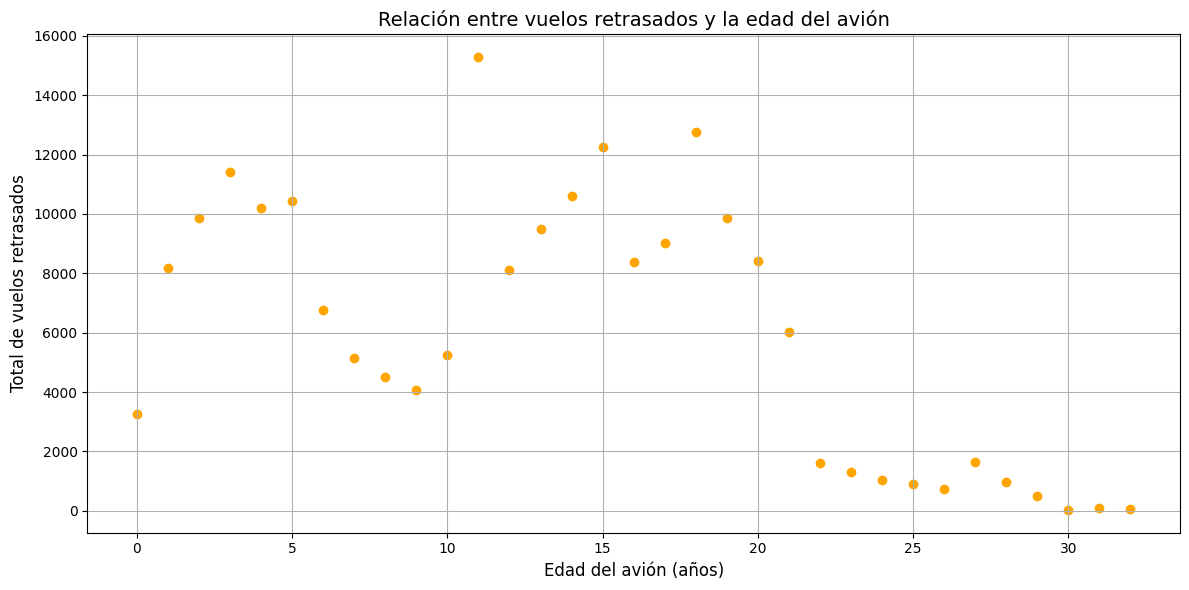

In [5]:
Relacion_vuelos_edad = """ SELECT plane_age AS "PLANE_AGE", SUM(CAST(dep_del15 AS INT)) AS "Suma_DEP_DEL15" FROM flights GROUP BY plane_age ORDER BY plane_age; """
relacion_vuelos_edad = pd.read_sql(Relacion_vuelos_edad, connection)

plt.figure(figsize=(12, 6))
plt.scatter(relacion_vuelos_edad['PLANE_AGE'], relacion_vuelos_edad['Suma_DEP_DEL15'], color='orange')
plt.title('Relación entre vuelos retrasados y la edad del avión', fontsize=14)
plt.xlabel('Edad del avión (años)', fontsize=12)
plt.ylabel('Total de vuelos retrasados', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Total vuelos por edad del avion 

/var/folders/q1/5dh64yhx1c70xmzjkwz67x780000gn/T/ipykernel_5455/2368286214.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vuelos_edad = pd.read_sql(vuelos_por_edad, connection)


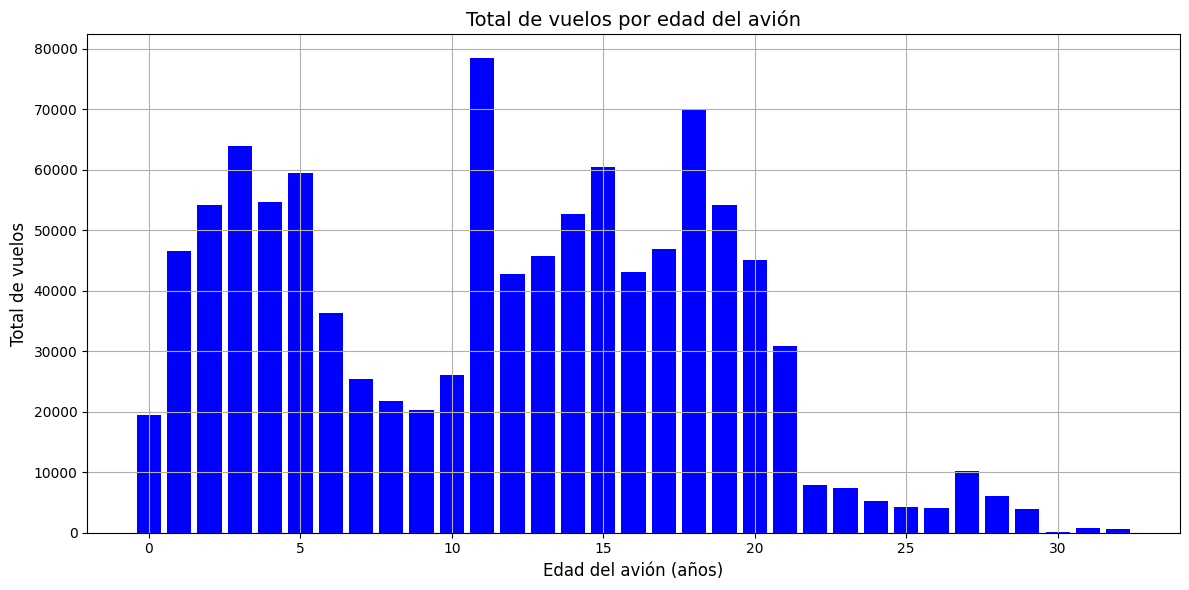

In [6]:
vuelos_por_edad = """ SELECT plane_age AS "PLANE_AGE", COUNT(*) AS "Total_Flights" FROM flights GROUP BY plane_age ORDER BY plane_age; """
vuelos_edad = pd.read_sql(vuelos_por_edad, connection)

plt.figure(figsize=(12, 6))
plt.bar(vuelos_edad['PLANE_AGE'], vuelos_edad['Total_Flights'], color='blue')
plt.title('Total de vuelos por edad del avión', fontsize=14)
plt.xlabel('Edad del avión (años)', fontsize=12)
plt.ylabel('Total de vuelos', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Proporcion vuelos retrasados por edad del avion 

/var/folders/q1/5dh64yhx1c70xmzjkwz67x780000gn/T/ipykernel_5455/2328636071.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vuelos_retrasados_edad = pd.read_sql(vuelos_retrasados_edad_avion, connection)


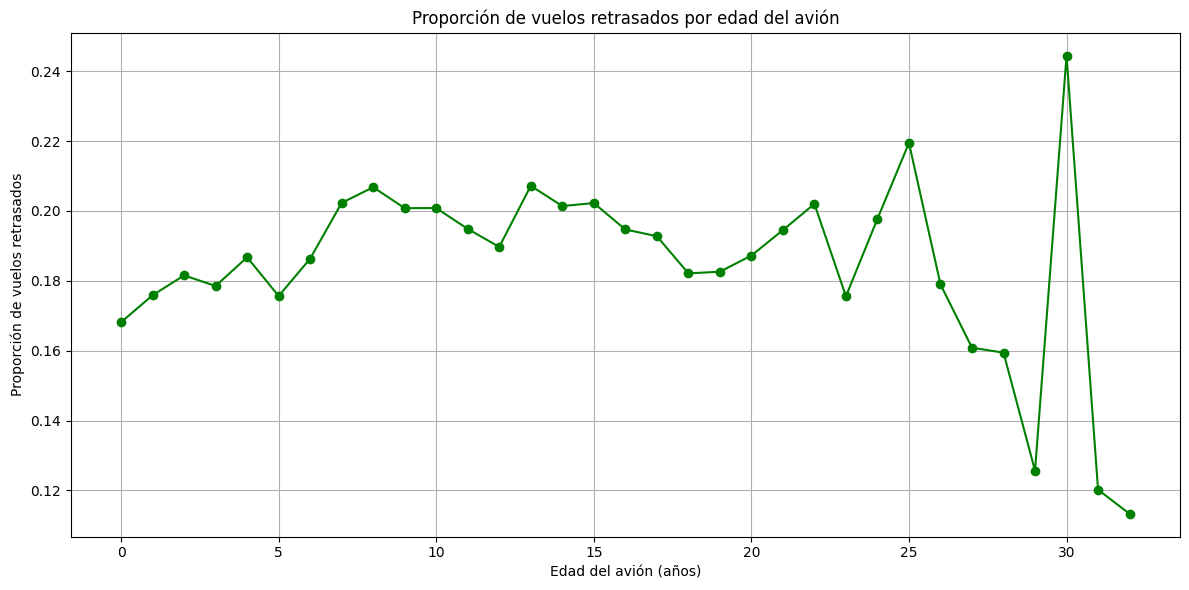

In [7]:
vuelos_retrasados_edad_avion = """ SELECT plane_age AS "PLANE_AGE", SUM(CAST(dep_del15 AS INT)) AS "Suma_DEP_DEL15", COUNT(*) AS "Total_Flights" FROM flights GROUP BY plane_age ORDER BY plane_age; """

vuelos_retrasados_edad = pd.read_sql(vuelos_retrasados_edad_avion, connection)

vuelos_retrasados_edad['Proporción_Retrasos'] = vuelos_retrasados_edad['Suma_DEP_DEL15'] / vuelos_retrasados_edad['Total_Flights']

plt.figure(figsize=(12, 6))
plt.plot(vuelos_retrasados_edad['PLANE_AGE'], vuelos_retrasados_edad['Proporción_Retrasos'], marker='o', linestyle='-', color='green')
plt.title('Proporción de vuelos retrasados por edad del avión')
plt.xlabel('Edad del avión (años)')
plt.ylabel('Proporción de vuelos retrasados')
plt.grid(True)
plt.tight_layout()
plt.show()

Se puede ver que Los aviones jóvenes y de mediana edad (0-20 años) mantienen una proporción de retrasos relativamente estable, lo que sugiere que durante esta fase, los aviones son bastante fiables y su operación es consistente.

Mientras que los aviones que superan los 20 años comienzan a mostrar un incremento en la proporción de retrasos, lo que indica que el envejecimiento de la flota podría estar contribuyendo a una mayor incidencia de retrasos en los vuelos 

#### Relacion entre la temperatura y la cantidad de vuelos retrasados por mes 

/var/folders/q1/5dh64yhx1c70xmzjkwz67x780000gn/T/ipykernel_5455/2751665859.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temperatura_promedio_vuelos = pd.read_sql(temperatura_promedio, connection)


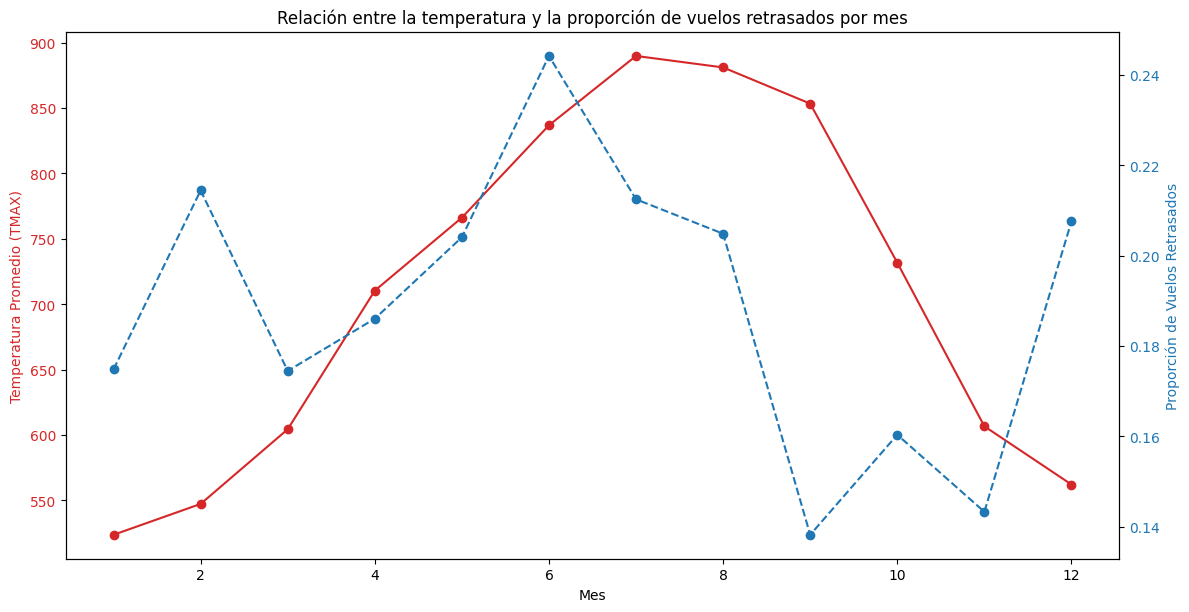

In [8]:
temperatura_promedio = """ SELECT month, AVG(tmax) AS "Temperatura_Promedio", SUM(CAST(dep_del15 AS INT)) AS "Vuelos_Retrasados", COUNT(*) AS "Total_Vuelos" FROM flights GROUP BY month ORDER BY month; """

temperatura_promedio_vuelos = pd.read_sql(temperatura_promedio, connection)

temperatura_promedio_vuelos['Proporción_Retrasos'] = temperatura_promedio_vuelos['Vuelos_Retrasados'] / temperatura_promedio_vuelos['Total_Vuelos']

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Mes')
ax1.set_ylabel('Temperatura Promedio (TMAX)', color='tab:red')
ax1.plot(temperatura_promedio_vuelos['month'], temperatura_promedio_vuelos['Temperatura_Promedio'], color='tab:red', marker='o', label='Temperatura Promedio')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Proporción de Vuelos Retrasados', color='tab:blue')
ax2.plot(temperatura_promedio_vuelos['month'], temperatura_promedio_vuelos['Proporción_Retrasos'], color='tab:blue', marker='o', linestyle='--', label='Proporción de Vuelos Retrasados')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.title('Relación entre la temperatura y la proporción de vuelos retrasados por mes')
plt.show()

La gráfica sugiere que durante los meses más calurosos hay una tendencia a que los vuelos se retrasen más Sin embargo, no es el único factor, ya que también se observan picos de retrasos en meses más fríos, lo que indica que otros factores también influyen en los retrasos.

#### Calculamos matriz de correlacion 

/var/folders/q1/5dh64yhx1c70xmzjkwz67x780000gn/T/ipykernel_5455/359200002.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  matriz_correlacion_variables = pd.read_sql(matriz_correlacion, connection)


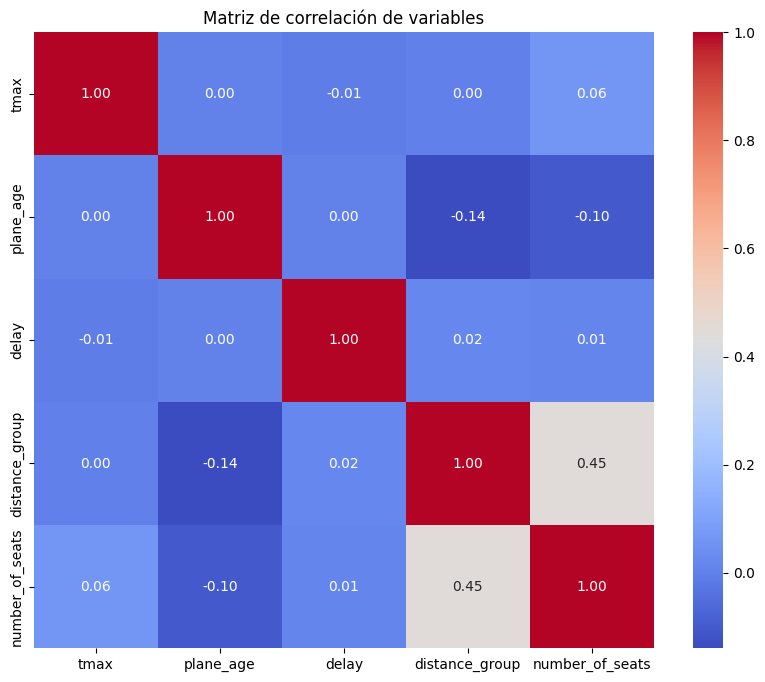

In [9]:
matriz_correlacion = """ SELECT tmax, plane_age, dep_del15::int AS delay,distance_group, number_of_seats FROM flights; """

matriz_correlacion_variables = pd.read_sql(matriz_correlacion, connection)

matriz_correlacion = matriz_correlacion_variables.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de variables')
plt.show()

Podemos observar la ausencia de correlaciones fuertes entre los retrasos y las variables disponibles lo que sugiere que los factores que influyen en los retrasos podrían no ser lineales.

#### Varianza explicada por cada componente principal

/var/folders/q1/5dh64yhx1c70xmzjkwz67x780000gn/T/ipykernel_5455/2923691586.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  varianza_componente_princial = pd.read_sql(varianza, connection)


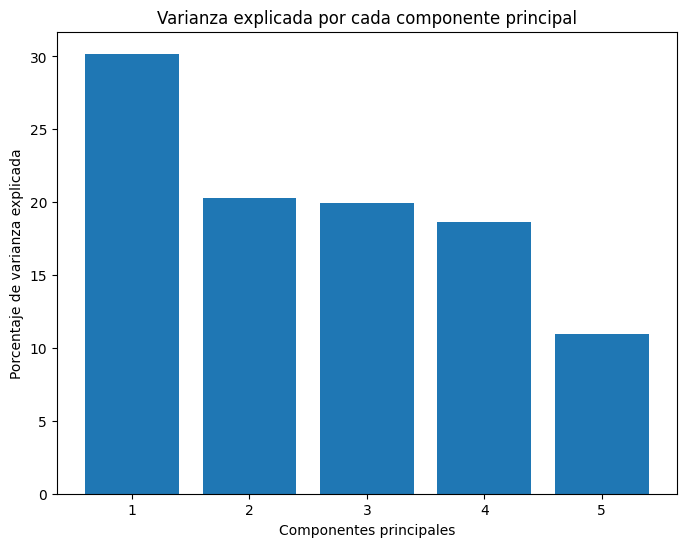

In [10]:
varianza = """ SELECT tmax, plane_age, dep_del15::int AS delay, distance_group, number_of_seats  FROM flights; """

varianza_componente_princial = pd.read_sql(varianza, connection)

scaler = StandardScaler()
scaled_df = scaler.fit_transform(varianza_componente_princial)

pca = PCA(n_components=len(varianza_componente_princial.columns))
pca_components = pca.fit_transform(scaled_df)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100)
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.title('Varianza explicada por cada componente principal')
plt.show()

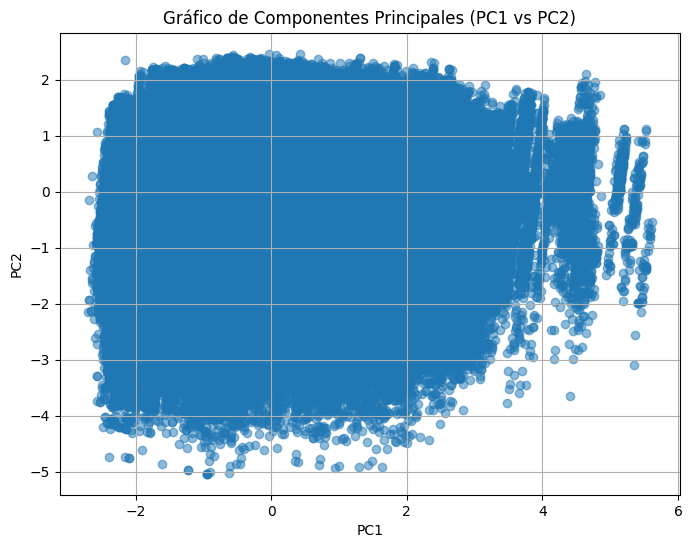

         tmax  plane_age     delay  distance_group  number_of_seats
PC1  0.080276  -0.317418  0.036646        0.671222         0.664017
PC2  0.796224   0.147910 -0.580493       -0.056259         0.063351
PC3  0.496388   0.365625  0.783347       -0.007321         0.078936
PC4 -0.324203   0.860445 -0.219100        0.212992         0.247299
PC5  0.089862   0.057632 -0.006859        0.707726        -0.698341


In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5)
plt.title('Gráfico de Componentes Principales (PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

pca_components_weights = pd.DataFrame(pca.components_, columns=varianza_componente_princial.columns, index=[f'PC{i}' for i in range(1, len(varianza_componente_princial.columns) + 1)])
print(pca_components_weights)

Varianza Explicada por los Componentes Principales:
- El primer componente principal (PC1) explica aproximadamente el 30% de la varianza total en los datos.
- Los siguientes tres componentes (PC2, PC3 y PC4) explican entre un 20% y 25% cada uno.
- El quinto componente principal (PC5) explica un menor porcentaje de la varianza, alrededor del 10%.
Esto nos sugiere que los primeros tres o cuatro componentes son los más significativos para capturar la mayor parte de la información presente en los datos.

Gráfico de Componentes Principales (PC1 vs PC2):

- El gráfico de dispersión entre PC1 y PC2 nos muestra cómo se distribuyen los datos en el espacio de los primeros dos componentes principales. este gráfico nos da una idea de cómo los datos pueden agruparse o dispersarse en este nuevo espacio reducido.

Contribución de Variables a los Componentes Principales:

- PC1: Está dominado principalmente por distance_group y number_of_seats, con contribuciones negativas significativas de plane_age. Esto sugiere que el primer componente principal está muy relacionado con las características del avión y la distancia del vuelo.
- PC2: Está dominado por tmax (temperatura máxima), y tiene una contribución negativa significativa de delay. Esto podría indicar que el segundo componente principal captura la relación entre la temperatura y los retrasos.
- PC3: Tiene una fuerte influencia de delay, lo que sugiere que este componente captura la variabilidad en los retrasos, junto con alguna influencia de plane_age.
- PC4: Está dominado por plane_age, lo que indica que este componente captura principalmente la variabilidad relacionada con la edad del avión.
- PC5: Está principalmente influenciado por distance_group y number_of_seats, aunque con una dirección opuesta en comparación con PC1.

Componentes Dominantes:

- Los primeros dos componentes principales (PC1 y PC2) están altamente influenciados por distance_group, number_of_seats y tmax. Esto indica que estas variables juegan un papel importante en la variabilidad general de los datos.
Retrasos y Edad del Avión:

- Aunque plane_age y delay contribuyen a la varianza en los componentes principales, su influencia se distribuye entre varios componentes, lo que sugiere que no son factores dominantes en un solo componente principal, sino que su impacto es más complejo y multifacético.